In [33]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os
import tensorflow as tf
import sklearn

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "/home/jeunghwankim/DeepLearning/DeepLearning/Exercise/Hands_on_ml/13_cnn/contents/data/"
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [34]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [35]:
import tensorflow as tf

In [36]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

/home/jeunghwankim/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/jeunghwankim/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/jeunghwankim/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/jeunghwankim/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imre

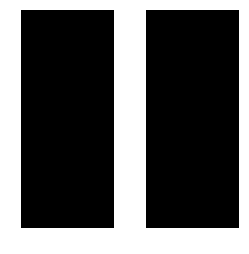

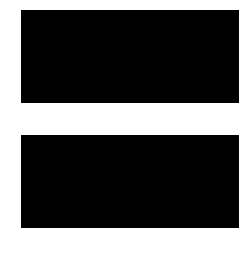

In [37]:
# shape ( height, width, channel, layer_num)
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

In [38]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1, 1, 1, 1], padding="SAME")
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

In [39]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: images})

/home/jeunghwankim/DeepLearning/DeepLearning/Exercise/Hands_on_ml/13_cnn/contents/data/images/cnn/china_original_small.png


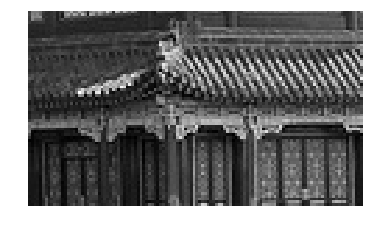

In [43]:
plot_image(images[0, :, :, 0])
save_fig("china_original_small", tight_layout=False)
plt.show()

/home/jeunghwankim/DeepLearning/DeepLearning/Exercise/Hands_on_ml/13_cnn/contents/data/images/cnn/china_vertical.png


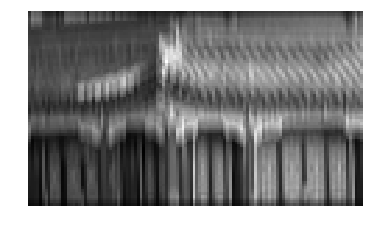

In [44]:
plot_image(output[0, :, :, 0])
save_fig("china_vertical", tight_layout=False)
plt.show()

/home/jeunghwankim/DeepLearning/DeepLearning/Exercise/Hands_on_ml/13_cnn/contents/data/images/cnn/china_horizontal.png


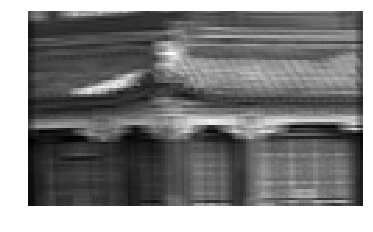

In [45]:
plot_image(output[0, :, :, 1])
save_fig("china_horizontal", tight_layout=False)
plt.show()

/home/jeunghwankim/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/jeunghwankim/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/jeunghwankim/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/jeunghwankim/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imre

(2, 427, 640, 3)
(2, 214, 320, 2)


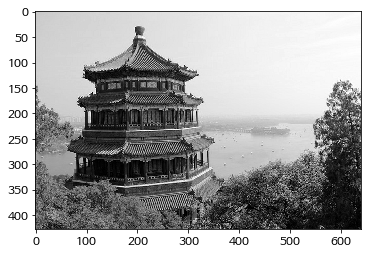

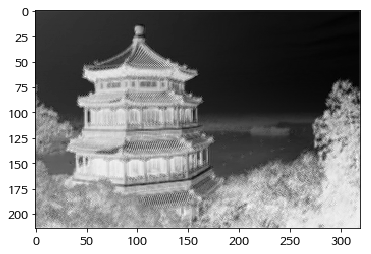

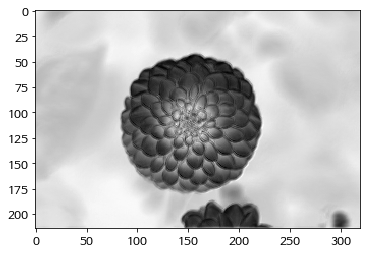

In [99]:
import numpy as np
from sklearn.datasets import load_sample_images

#Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

# dataset을 np 배열로 형태 변형을 한다. 
dataset = np.array([china, flower], dtype=np.float32)
# batch input은 4D tensor
batch_size, height, width, channels = dataset.shape


# Creater 2 filter 
#f_height, f_width : 수용장의 크기 즉 filter의 크기라 봐도 무방하다. 
#f_prev, f_cur : 이전 레이어의 특성 맵 개수, 현재 레이어의 특성 맵 개수 
# filter는 [f_height, f_width, f_prev, f_cur], 4D 
# filter ( filter _w, filter_h, fan_in_featnum, fan_out_featnum) 
filters = np.zeros(shape= (7, 7, channels, 2 ), dtype=np.float32)

filters[:, 3, :, 0] = 1 # vercial line
filters[3, :, :, 1] = 1 # horizontal line


# Build graph
reset_graph()

graph = tf.Graph()
graph.as_default()

my_filter = tf.truncated_normal(shape=(7, 7, channels, 2 ), dtype=tf.float32)

#build graph
X = tf.placeholder(dtype=tf.float32, shape = (None, height, width, channels))

convolution = tf.nn.conv2d(X, my_filter, strides=[1, 2, 2, 1], padding="SAME")
# filters2 = np.zeros(shape= (7, 7, 2, 2 ), dtype=np.float32)

# convolution2 = tf.nn.conv2d(convolution, filters2, strides=[1, 2, 2, 1], padding="SAME")


with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})
    
    print(dataset.shape)
    print(output.shape)
    
    
plt.imshow(dataset[0, :, :, 1], cmap="gray")    
plt.show()
plt.imshow(output[0, :, :, 1], cmap="gray")
plt.show()


plt.imshow(output[1, :, :, 1], cmap="gray")
plt.show()


In [103]:
reset_graph()

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2],
                        padding="SAME")

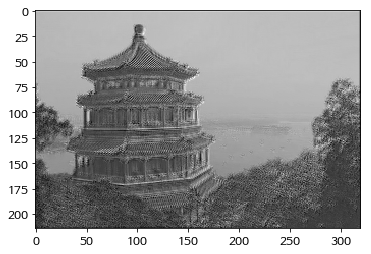

In [105]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})
    
plt.imshow(output[0, :, :, 1], cmap="gray") 
plt.show()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})



In [113]:
X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides = [1,2,2,1], padding="VALID")

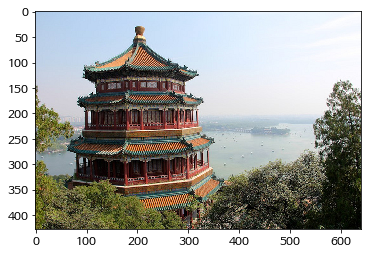

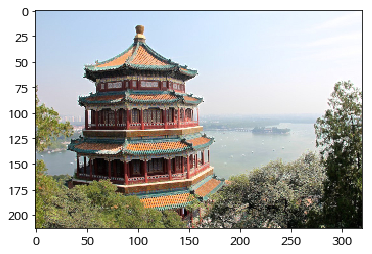

In [114]:
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    

plt.imshow(dataset[0].astype(np.uint8))
plt.show()
plt.imshow(output[0].astype(np.uint8))
plt.show()